In [2]:
import torch
from torchvision import datasets, transforms
import e2cnn
from e2cnn import nn as e2nn
import numpy as np
import pickle
import sys
from matplotlib import pyplot as plt
import seaborn as sns

# local imports
from src.nn_training import Group, plot_schatten_norm_sums_and_loss
from src.nn_training import g_net, conv_net, fc_net
from src.nn_training import relu_g_net, relu_conv_net, relu_fc_net
from src.nn_training import relu_g_net_pool, relu_conv_net_pool, relu_fc_net_pool
from src.utils import get_training_dataframes, postprocess

In [3]:
transform_comp = transforms.Compose([transforms.ToTensor(),
                                     transforms.Resize((28, 28)),
                                     transforms.Normalize((0.1307,), (0.3081,))])
mnist_data = datasets.MNIST('./data', transform=transform_comp, download=True)

batch_size = 50
data_loader = torch.utils.data.DataLoader(mnist_data,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=20)

/mnt/cfs/home/krisgrg/conda_envs/ffcv_kris/lib/python3.9/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 10, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [4]:
def exp_loss(y_pred, y):
    """
    Exponential loss for classification.
    """
    print(torch.exp(-torch.real(y_pred) * y))
    return torch.mean(torch.exp(-torch.real(y_pred) * y))

In [ ]:
# %%time
experiment_name = "MNIST_CNN_100_epochs"
group = Group('MNIST')
N = 1 # average over trajectories
force_train = False

nets = {"CNN": conv_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs, net = plot_schatten_norm_sums_and_loss(nets, group, dataloader=data_loader,
                                            postprocess_fn=postprocess,
                                            N=N, epochs=100, cuda=False,
                                            dfs=dfs, exp_name=experiment_name,
                                            lr=2e-6)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
%%time
experiment_name = "MNIST_GCNN_100_epochs"
group = Group('MNIST')
N = 1 # average over trajectories
force_train = False

nets = {"G-CNN": g_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs, net = plot_schatten_norm_sums_and_loss(nets, group, dataloader=data_loader, postprocess_fn=postprocess,
                                       N=N, epochs=100, cuda=True, dfs=dfs, exp_name=experiment_name, lr=2e-6)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
%%time
experiment_name = "MNIST_FC_100_epochs"
group = Group('MNIST')
N = 2 # average over trajectories
force_train = False

nets = {"FC": fc_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs, net = plot_schatten_norm_sums_and_loss(nets, group, dataloader=data_loader, postprocess_fn=postprocess,
                                       N=N, epochs=100, cuda=True, dfs=dfs, exp_name=experiment_name, lr=0.0001)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
experiment_name = 'MNIST_FC_100_epochs'
with open(f'data/training/{experiment_name}.pickle', 'rb') as f:
    dfs_fc = pickle.load(f)

experiment_name = 'MNIST_CNN_100_epochs'
with open(f'data/training/{experiment_name}.pickle', 'rb') as f:
    dfs_cnn = pickle.load(f)

experiment_name = 'MNIST_GCNN_100_epochs'
with open(f'data/training/{experiment_name}.pickle', 'rb') as f:
    dfs_gcnn = pickle.load(f)

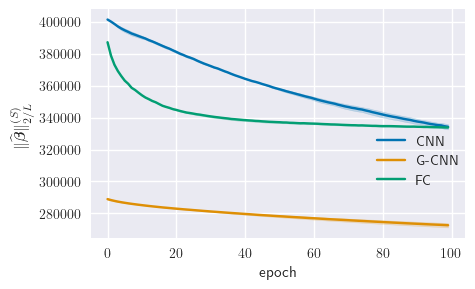

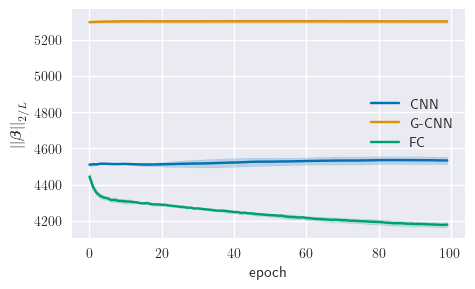

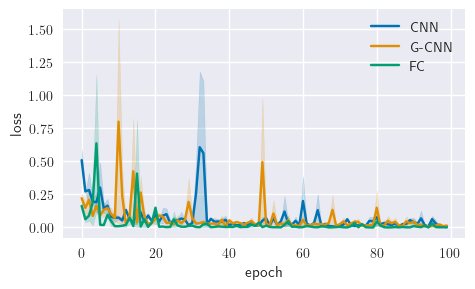

In [8]:
dfs = {**dfs_cnn, **dfs_gcnn, **dfs_fc}
experiment_name = 'MNIST_plot'
group = Group('MNIST')
dfs = plot_schatten_norm_sums_and_loss(nets={}, group=group, dataloader=data_loader, postprocess_fn=postprocess,
                                       N=0, epochs=0, cuda=True, dfs=dfs, exp_name=experiment_name)